# Лабораторна робота №3

### Студента 1 групи МІТ-31

### Кульчицький Дмитро

In [104]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt #for plotting
from sklearn.datasets import make_classification
import random
import pylab as pl
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.069949,-0.099057,0.276290,0.960032,0.111160,1.950260,-0.097218,0.618093,0.810814,-0.174951,...,0.053781,0.628872,-1.353515,-1.350963,1.742865,0.350653,-0.059552,-1.870013,0.408330,2.0
1,-1.340878,-1.564258,0.473303,0.148886,-0.516297,1.645917,-0.577547,1.227200,0.299575,0.825670,...,-0.065909,-0.795116,0.968021,-0.400719,1.106486,0.298593,-0.004347,-1.099351,0.478567,2.0
2,0.498974,2.440092,-0.974503,0.457549,-0.219789,-1.983590,1.402321,0.325342,-0.809540,-0.159583,...,-0.951485,-0.914714,0.863224,0.393924,-1.545838,0.600496,0.391469,1.603929,-1.263129,1.0
3,1.719164,1.388181,0.952790,0.322195,-0.399676,-2.486832,0.373870,-0.317297,-0.198320,0.234074,...,1.415922,-0.780659,-1.238058,-0.437774,-1.247345,1.520979,-0.503661,1.103265,0.752960,1.0
4,0.042472,0.833398,-1.301905,-1.960006,0.611468,-1.170899,-1.978014,0.441787,0.254007,0.912783,...,1.283641,-0.585768,0.314048,0.684142,-0.261082,1.505358,0.626526,0.090795,0.103997,0.0
5,1.627961,0.355876,-0.021666,0.927143,-0.271983,-1.448903,0.699686,-0.795855,-1.081774,0.289802,...,-0.554313,0.276493,2.270277,0.060092,-0.440800,0.419410,-1.070871,0.267055,0.058765,0.0
6,-0.656966,-1.292695,-0.923587,1.641913,-0.940616,0.387693,-0.013228,1.226814,0.650432,0.104469,...,-0.220942,-1.833311,0.322021,-0.934603,0.836775,0.164312,1.348112,-1.016032,-0.238408,0.0
7,-0.619182,-0.723083,0.418047,-0.954514,-0.130957,1.547487,0.306166,0.368590,1.261364,-0.760938,...,-0.201277,0.447660,0.452013,0.041811,1.323124,0.188456,0.052006,-1.405232,-0.493614,2.0
8,0.190188,-2.114223,-1.265008,0.072227,-0.147312,2.803066,-0.159691,0.803682,1.229352,-2.226284,...,-1.507910,0.909103,-1.663837,0.045733,2.273581,1.624887,-0.065837,-2.383656,-0.302222,0.0
9,-1.141708,-0.719337,0.910620,0.795877,-1.327164,0.725794,-0.492150,0.426675,-2.079486,1.017787,...,-2.059080,-0.434962,-1.960869,0.313791,0.820607,-0.340183,-0.722304,-0.921941,0.086566,0.0


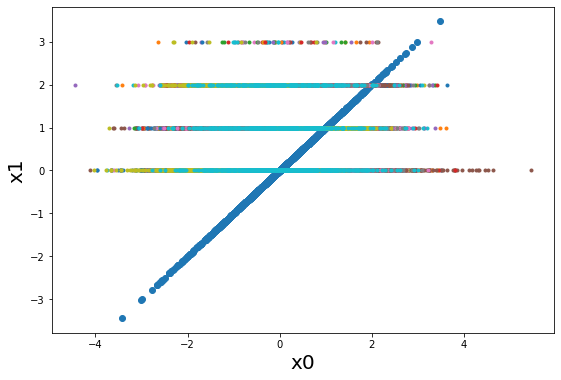

In [105]:
X, y = datasets.make_classification(n_samples=1256, n_classes=4,
                                    n_clusters_per_class=1, weights=[0.5, 0.3, 0.2], random_state=0)
fig, ax = plt.subplots(figsize=(9, 6))
plt.xlabel("x0", fontsize=20)
plt.ylabel("x1", fontsize=20)
plt.scatter(X[:,1], X[:,1])

plt.ion() #interactive plot on
plt.plot(X,y,'.',label='training data')

df = pd.DataFrame(np.c_[X, y])
df.to_csv('./results.csv', index=None)
DataRead = pd.read_csv("./results.csv")
DataRead.head(19)

In [106]:
col = []
X_array = []
Y_array = []
coef_array = []

for i in range(1000):
    X_array.append(random.uniform(-3.0, 3.0))
    Y_array.append(random.uniform(-250.0, 250.0))

col.append(X_array)
col.append(Y_array)

data = pd.DataFrame(data={'X':col[0],'Y':col[1]})
data.to_csv('./dataframe_results.csv', index=None, columns=['X', 'Y'])

In [107]:
data = pd.read_csv("./audi.csv")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [108]:
print(data.shape)

(10668, 9)


In [109]:
print(data['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


In [110]:
print(data.groupby('price').size())

price
1490      1
1699      1
1975      1
1990      1
2490      3
         ..
133900    1
135000    1
137500    1
137995    1
145000    1
Length: 3260, dtype: int64


In [87]:
plt.figure(figsize = (16,8), dpi = 1000)
sns.countplot(data["price"][0:750])
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-small')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [88]:
plt.figure(figsize = (16,8), dpi = 1000)
sns.countplot(data["price"][750:1500])
plt.xticks(rotation=90, horizontalalignment='right', fontweight='light', fontsize='x-small')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


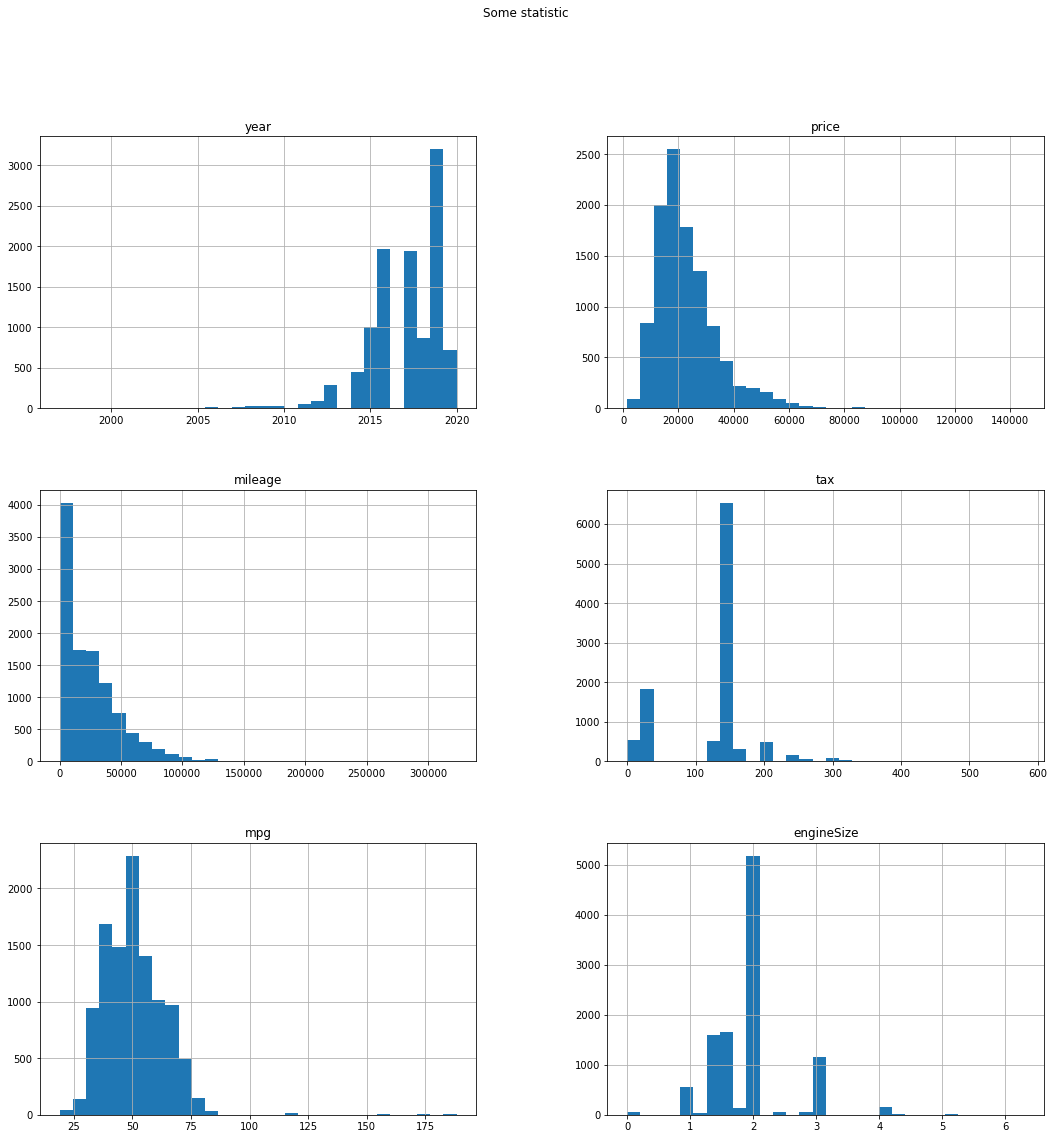

In [89]:
New_data = data
New_data.drop('price' ,axis=1)
New_data.hist(bins=30, figsize=(18,18))
pl.suptitle("Some statistic")
plt.show()


Text(0.5, 0.98, 'Scatter-matrix for each input variable')

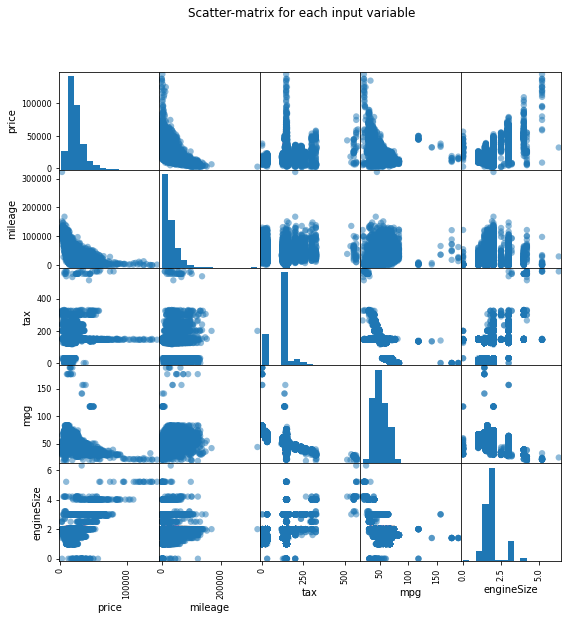

In [90]:

feature_names = ['price', 'mileage','tax','mpg', 'engineSize']
X = New_data[feature_names]
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')



In [91]:
data.describe(percentiles = [.20, .40, .60, .80])

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
20%,2016.000000,13995.000000,4982.400000,30.000000,39.800000,1.400000
40%,2017.000000,18380.800000,12118.200000,145.000000,47.100000,2.000000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
60%,2018.000000,22945.000000,25529.400000,145.000000,52.300000,2.000000
80%,2019.000000,29990.000000,41221.000000,150.000000,61.400000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [92]:
ord_enc = OrdinalEncoder()
data['model'] = ord_enc.fit_transform(data[['mpg']])
y = data['model']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  float64
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 750.2+ KB


In [94]:
updated_df = df.dropna(axis=1)
updated_df.info()

y = updated_df[20]


X_train, X_test,y_train,y_test = train_test_split(updated_df,y)
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1256 non-null   float64
 1   1       1256 non-null   float64
 2   2       1256 non-null   float64
 3   3       1256 non-null   float64
 4   4       1256 non-null   float64
 5   5       1256 non-null   float64
 6   6       1256 non-null   float64
 7   7       1256 non-null   float64
 8   8       1256 non-null   float64
 9   9       1256 non-null   float64
 10  10      1256 non-null   float64
 11  11      1256 non-null   float64
 12  12      1256 non-null   float64
 13  13      1256 non-null   float64
 14  14      1256 non-null   float64
 15  15      1256 non-null   float64
 16  16      1256 non-null   float64
 17  17      1256 non-null   float64
 18  18      1256 non-null   float64
 19  19      1256 non-null   float64
 20  20      1256 non-null   float64
dtypes: float64(21)
memory usage: 206.2 KB

In [95]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.99


In [96]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [97]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.92


In [98]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.90
Accuracy of LDA classifier on test set: 0.90


In [99]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


In [100]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.99


In [101]:

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[144   7   4   0]
 [  9  87   1   0]
 [  1   3  57   1]
 [  0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       155
         1.0       0.90      0.90      0.90        97
         2.0       0.92      0.92      0.92        62
         3.0       0.00      0.00      0.00         0

    accuracy                           0.92       314
   macro avg       0.69      0.69      0.69       314
weighted avg       0.92      0.92      0.92       314



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
X_train[0]

1071   -0.970692
216    -2.075977
1216   -0.322482
168     0.347055
792    -1.200824
          ...   
226    -0.394977
175     0.790022
381     0.544934
1207    0.567966
110    -0.450532
Name: 0, Length: 942, dtype: float64

<ipython-input-103-c11b9b6a4995>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)


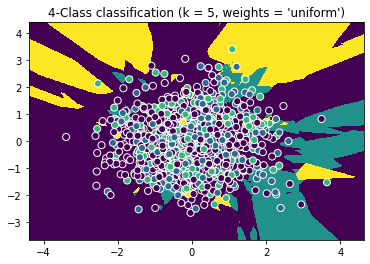

In [103]:
X_train, X_test, y_train, y_test = train_test_split(updated_df, y)

def plot_life_knn(X, y, n_neighbors, weights):
    X_mat = X[[0,3]].values
    y_mat = y.values

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)


    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
        
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                            np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z)

    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, edgecolor = 'white')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
    plt.show()

plot_life_knn(X_train, y_train, 5, 'uniform')